# The Boston Housing Dataset
### Machine Learning and Statistics Assessment 2019
#### Due November 29th 2019
#### Simon McLain G00364775
### Introduction to the Boston Dataset
The Boston house-price was utilised by David Harrison Jr. and Daniel L. Rubinfeld in their paper "Hedonic Housing Prices and the Demand for Clean Air" published in the Journal of Environmental Economics and Management 5, pg. 82-102 in 1978. Their purpose was to derive an equation to express the willingness to pay more for housing if buyers or renters percieve improved air quality. The dataset containing 506 data points for 13 numeric/ categorical predictive attributes was used to identify price factors according to the premises internal and external characteristics affecting it. The fourteenth attritbute "Medium Value" is the dependent variable, their hypothesis being that the numeric/ categorical attributes within the dataset could be used to predict the "Medium Value" of housing. 

A link to their full article in provided in the references section along with blogs visited while conducting this assignment. Appendix I Table I describes the 13 attributes and background to the dataset, Table II displays the dataset and Table II displays the descriptive statistics. 

The dataset, now commonly referred to the Boston Housing Dataset is often used machine learning blogs and papers to discuss regression analysis

![title](pic.jpg)
##### The image is released free of copyrights under Creative Commons CC0


## Import Libraries for decriptive statistics

In [2]:
# Import libraries for analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy import stats
import keras as kr
%matplotlib inline


# Hide warnings to improve readibility
import warnings
warnings.filterwarnings('ignore')

## Load the Boston dataset

In [3]:
# Import Boston Housing dataset from SciKit Learn
from sklearn.datasets import load_boston
dataset = load_boston()

In [4]:
# discover the keys for the dataset
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
# Convert the dataset to a pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [6]:
# Add a new column to the dataframe for Median Values of housing
df['MEDV'] = dataset.target

## Describe the Dataset

We begin the statistical analysis by understanding the distribution of Median Housing Values [MEDV] In the distribution plot below housing values display a positive skew, where the right hand tail is longer than the left hand tail. 

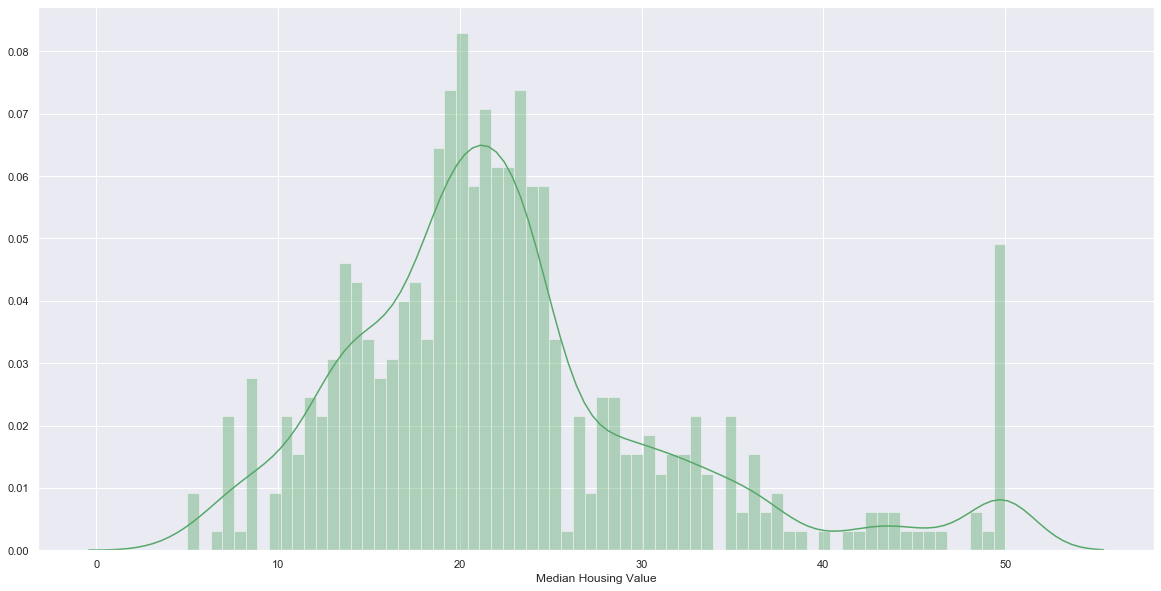

In [7]:
sns.set(rc={'figure.figsize':(20,10)})
x = pd.Series(df['MEDV'], name="Median Housing Value")
ax = sns.distplot(x, bins=70, color='g')

In [8]:
# Average Median Value of Housing
x = df.loc[:,"MEDV"].mean()
print("The Median Housing Value in the dataset is: ", round(x, 2))

The Median Housing Value in the dataset is:  22.53


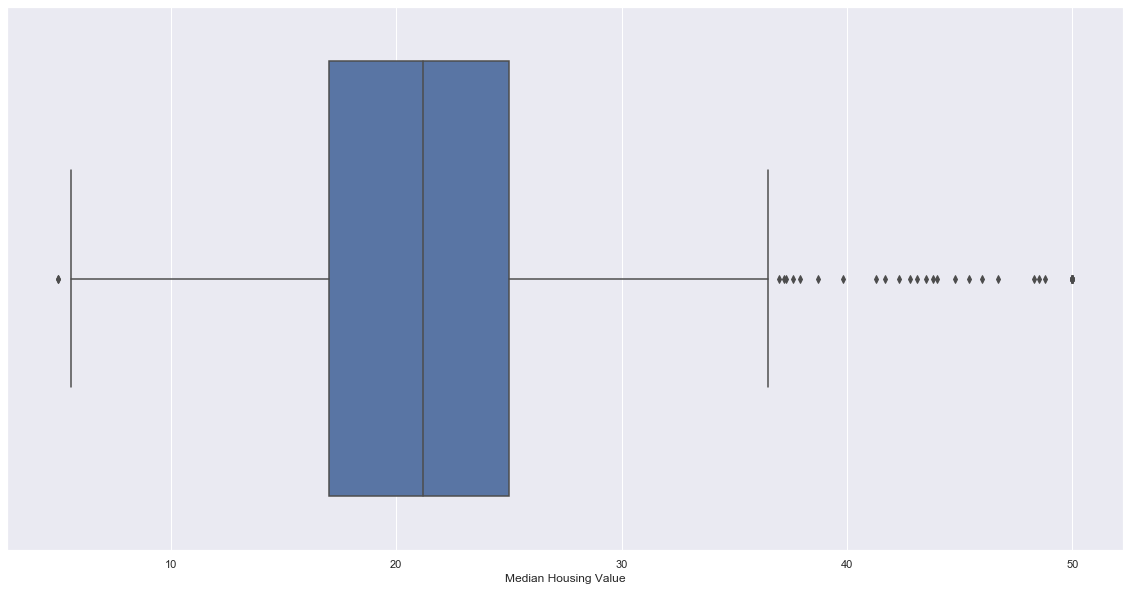

In [9]:
# NOTE: check use of boxplots and decide if this is appropriate
sns.set(rc={'figure.figsize':(20,10)})
x = pd.Series(df['MEDV'], name="Median Housing Value")
ax = sns.boxplot(x)

### Check for Multi-co-linearity

We also need to understand the relationship between independent variables (dataset attributes) in the dataset and whether or not there is multi-co-linearity between them. Multi-co-linearity occurs where greater values of one independent variable corrosponds to greater values in another independent variable, the opposite also holds true where lesser values of one independent variable corrosponds to lesser values in another independent variable. 

The importance of this check was discussed in several blog posts. As discussed by Springer (1997) Multi-co-linearity is a problem because "for regression analysis it undermines the statistical significance of an independent variable". In laymans terms, if independent variables correlate strongly with each other they should be removed from regression analysis. 

We can see that RAD (accessibility to radial highways) and TAX (full-value property-tax rate per $10,000) are strongly correlated with eachother, as are DIS ( weighted distances to five Boston employment centres) and AGE (proportion of owner-occupied units built prior to 1940)

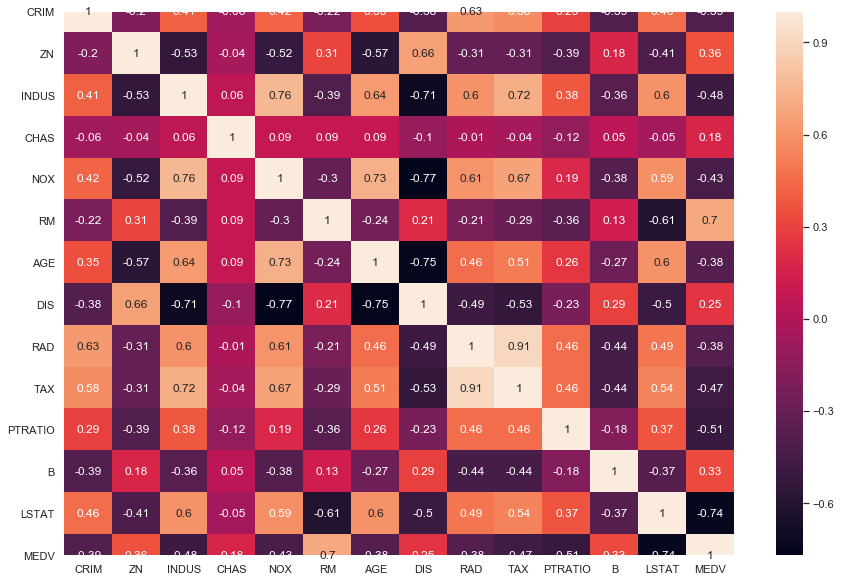

In [10]:
# Create a heat-map for all attributes to help identify multi-co-linearity
sns.set(rc={'figure.figsize':(15,10)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'RAD')

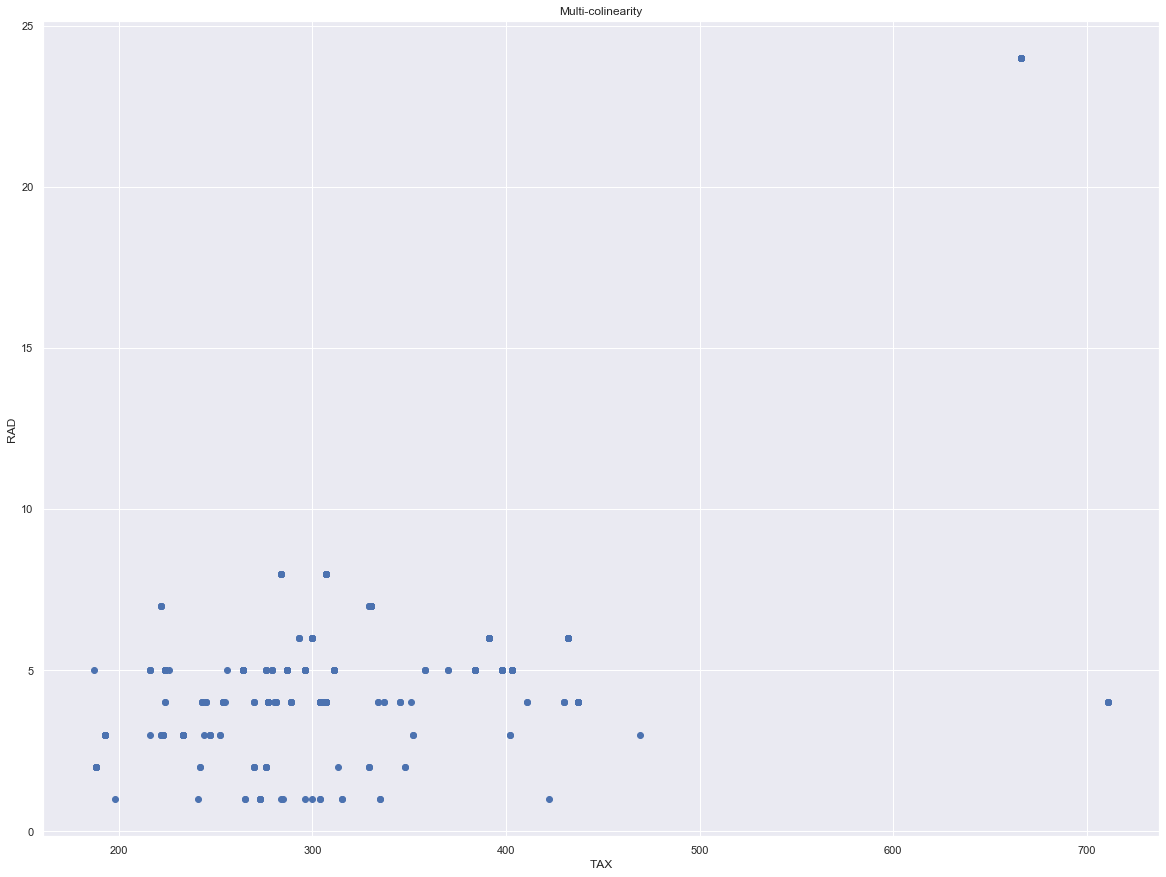

In [11]:
plt.figure(figsize=(20, 15))

x = df['TAX']
y = df['RAD']
plt.scatter(x, y, marker='o')
plt.title("Multi-colinearity")
plt.xlabel('TAX')
plt.ylabel('RAD')

Text(0, 0.5, 'DIS')

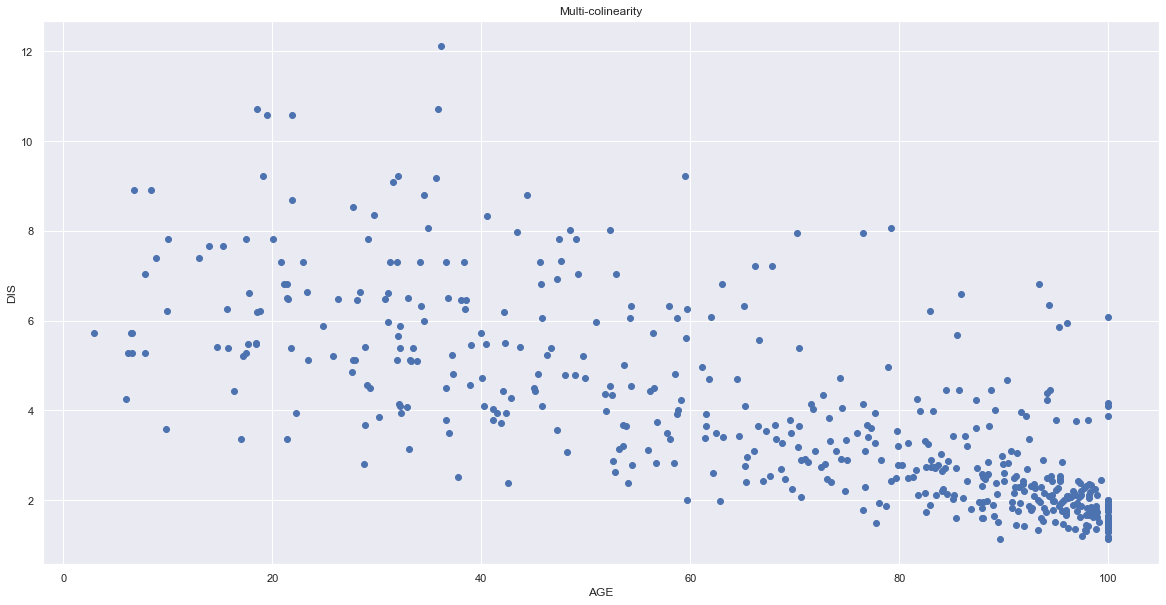

In [12]:
plt.figure(figsize=(20, 10))

x = df['AGE']
y = df['DIS']
plt.scatter(x, y, marker='o')
plt.title("Multi-colinearity")
plt.xlabel('AGE')
plt.ylabel('DIS')

Text(0, 0.5, 'INDUS')

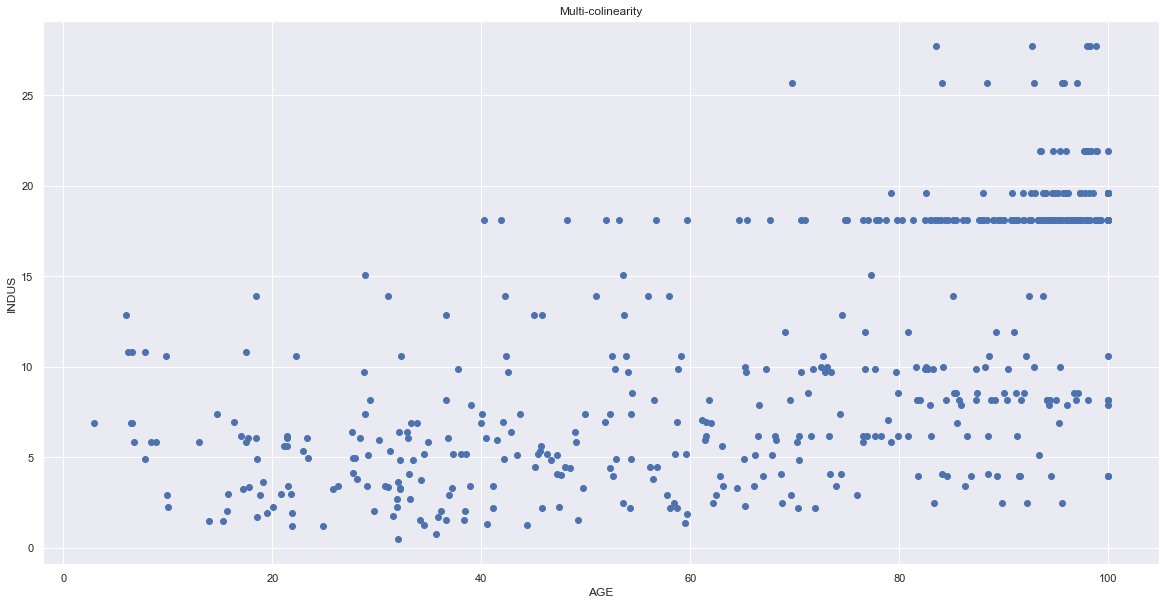

In [13]:
plt.figure(figsize=(20, 10))

x = df['AGE']
y = df['INDUS']
plt.scatter(x, y, marker='o')
plt.title("Multi-colinearity")
plt.xlabel('AGE')
plt.ylabel('INDUS')

In [14]:
# Remove RAD, TAX, DIS and AGE
cleaned_df = df.loc[:,['CRIM','ZN','INDUS','CHAS','NOX','RM','PTRATIO','B','LSTAT','MEDV']]
cleaned_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,18.7,396.90,5.33,36.2


### Load packages for creating the neural network

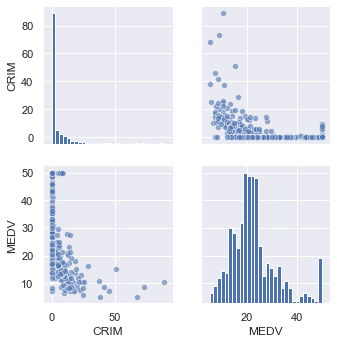

In [15]:
cols = ['CRIM','MEDV'] 
sns.pairplot(cleaned_df[cols],
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30}) 
plt.show()

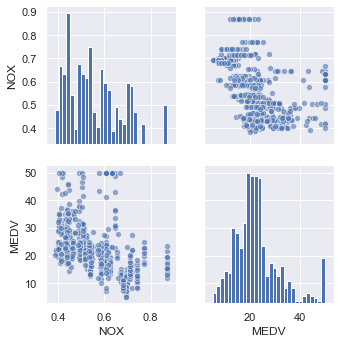

In [16]:
cols = ['NOX','MEDV'] 
sns.pairplot(cleaned_df[cols],
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30}) 
plt.show()

### Observations



## Appendix I

### Table I

In [17]:
# Description of the Boston Housing dataset
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Table II

In [18]:
# Deisplay the dataset
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Table III

In [19]:
# Descriptive Statistics for the Boston Housing dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### References
https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class

(1997) The problem of multicollinearity. In: Understanding Regression Analysis. Springer, Boston, MA

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

https://www.kaggle.com/prasadperera/the-boston-housing-dataset

Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://keras.rstudio.com/articles/tutorial_basic_regression.html

https://github.com/topics/boston-housing-price-prediction?o=desc&s=updated